# chạy các hàm

In [7]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(0)  # chọn GPU 0

In [8]:
from UniControlNet import GlobalAdapterPipeline
from PIL import Image

sd15_name = "SG161222/Realistic_Vision_V4.0_noVAE"
adapter_ckpt = "/home/uit2023/LuuTru/Thuchd/cs431/Uni-ControlNet/global_adapter_ckpt_finish/global_adapter_step_250000.pt"

In [9]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


In [10]:
pipe = GlobalAdapterPipeline(
    sd15_name=sd15_name,
    adapter_ckpt=adapter_ckpt,
    device="cuda",
)

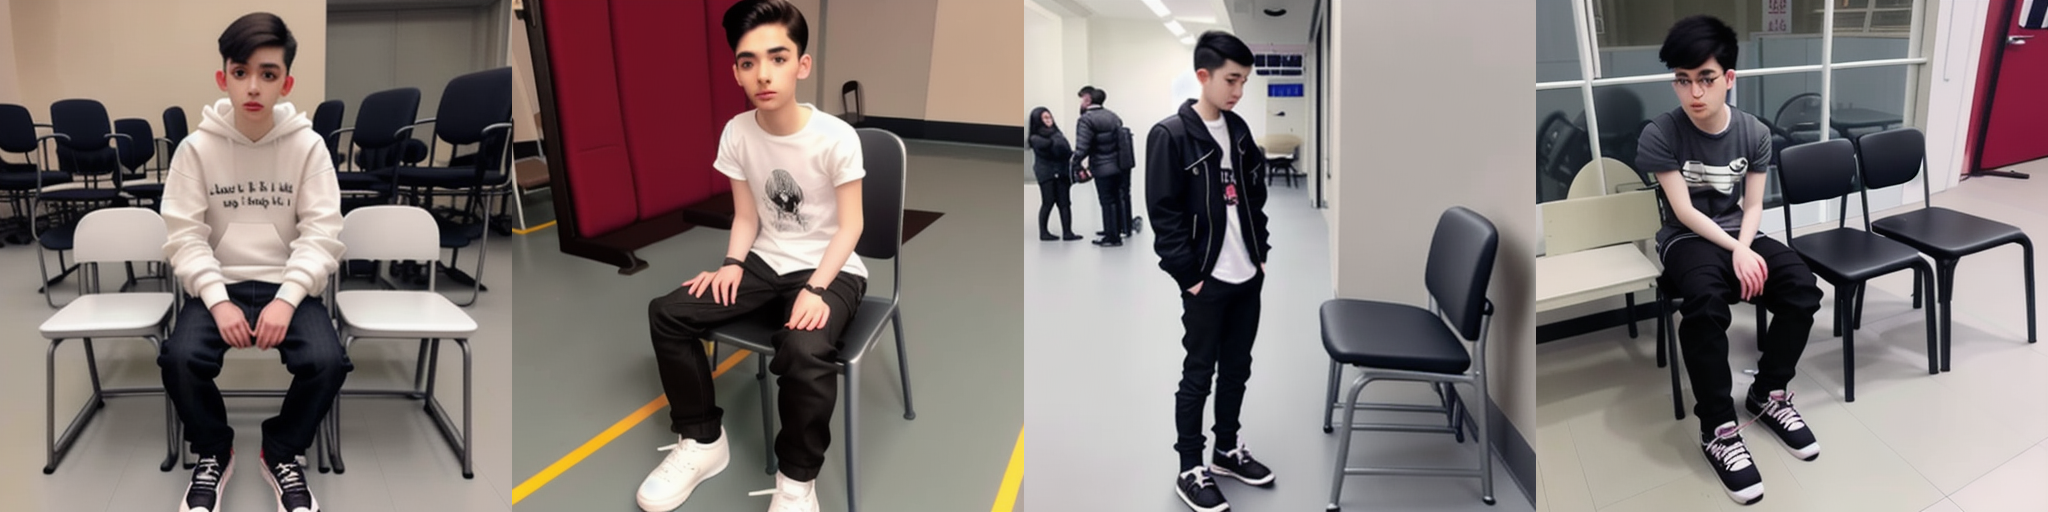

: 

In [ ]:
ref_image = Image.open("/home/uit2023/LuuTru/Thuchd/cs431/IPAdapter/assets/images/prompt6.jpg").convert("RGB")

images = pipe.generate(
    prompt="sit on a chair",
    image=ref_image,
    num_samples=4,
    num_inference_steps=50,
    seed=42,
    scale=1.0,
)

grid = image_grid(images, 1, 4)
grid